> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 4.2 - APIs


## Exercícios 🔭🌌🪐

Vamos acessar as APIs da NASA para ver algumas imagens interessantes capturadas universo afora!

#### Q1.
Crie uma chave no site oficial:
* https://api.nasa.gov

Vamos armazenar a chave de forma segura! <br>
Salve a sua chave em um arquivo `key.json` na forma:
`API_KEY=SUA_CHAVE`

Adicione o nome do arquivo `key.json` ao `.gitignore` do repositório que você fará upload da atividade.
Para isso basta abrir o arquivo `.gitignore` na pasta raíz do repositório (ou criar um caso ele não exista). Dentro do arquivo, apenas adiciona o nome do arquivo que deseja ignorar.

#### Q2. 🛰 Astronomy Picture of the Day (APOD) 🌌
> Antes de fazer os exercícios, devo te lembrar que existem limites de acesso às APIs, descritas na página principal, portanto pega leve na tentativa e erro na hora de testar seu código.

<img width=500 src=https://apod.nasa.gov/apod/image/2407/M24-HaLRGB-RC51_1024.jpg>

A primeira API que acessaremos é a mais popular de todas: astronomy picture of the day (foto astronômica do dia).

Faça uma requisição GET para a URL da API que retorna a imagem do dia! Essa é fácil já que são os valores padrão da rota principal:
* URL base: `'https://api.nasa.gov/planetary/apod'`
* Endpoint: não precisa preencher, acessaremos a raíz da API.
* Query params: preencha `api_key` com a sua chave de autenticação. Se animar mexer em outros parâmetros veja [a documentação](https://api.nasa.gov).

Ao receber a resposta (um json), você deve:
* Imprimir os campos `copyright` e `explanation`
* Com as biblioteca scikit-images e matplotlib, apresente a imagem a partir do campo `url` ou `hdurl`, e preencha o título do plot com o campo `title` do json. Uma dica de código a seguir.
```python
from skimage import io
img = io.imread(url)
## plot a matriz img com matplotlib (imshow)
```   

Copyright: 
Koen van Barneveld
 
Explanation:
This surprising sky has almost everything.  First, slanting down from the upper left and far in the distance is the central band of our Milky Way Galaxy.  More modestly, slanting down from the upper right and high in Earth's atmosphere is a bright meteor. The dim band of light across the central diagonal is zodiacal light: sunlight reflected from dust in the inner Solar System. The green glow on the far right is aurora high in Earth's atmosphere.  The bright zigzagging bright line near the bottom is just a light that was held by the scene-planning astrophotographer. This "almost everything" sky was captured over rocks on Castle Hill, New Zealand late last month.  The featured finished frame is a combination of 10 exposures all taken with the same camera and from the same location.  But what about the astrophotographer himself?  He's pictured too -- can you find him?   Jigsaw Fun: Astronomy Puzzle of the Day


Text(0.5, 1.0, 'An Almost Everything Sky')

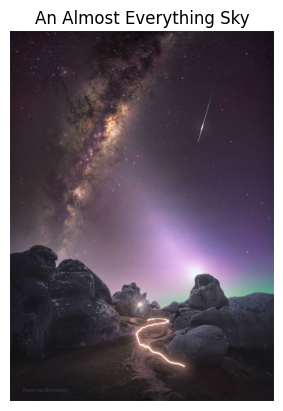

In [1]:
# !pip install requests
# !pip install scikit_image
# !pip install matplotlib

import json
import requests
from skimage import io
import matplotlib.pyplot as plt

# Abrindo arquivo com a chave
with open("key.json", "r") as fp:
    auth = json.load(fp)

API_KEY = auth["key"]

base_url = "https://api.nasa.gov/planetary/apod"
query_params = {
    "api_key" : API_KEY
}

# Conectando com API
res = requests.get(base_url, params=query_params)
res_data = res.json()

# Retirando dados da response da API
img_copyright = res_data["copyright"]
img_explanation = res_data["explanation"]
img_url = res_data["url"]
img_title = res_data["title"]

print(f"Copyright: {img_copyright}",
      f"\nExplanation:\n{img_explanation}")

img = io.imread(img_url)
plt.imshow(img)
plt.axis("off")
plt.title(img_title)

#### Q3. Limites
A partir da resposta da query anterios, imprima o header da resposta e consulte os atributos:
* X-RateLimit-Limit: o limite total de requisições da sua chave de API
* X-RateLimit-Remaining: o limite restante de requisições da sua chave de API

In [2]:
request = res.request
print(f"X-RateLimit-Limit: {res.headers["X-RateLimit-Limit"]}\n"
      f"X-RateLimit-Remaining: {res.headers["X-RateLimit-Remaining"]}")

X-RateLimit-Limit: 2000
X-RateLimit-Remaining: 1952


### Q4. Mars Rover Photos 🚀🚙 📷

<img width=500 src=https://www.nasa.gov/wp-content/uploads/2019/10/pia23378-16.jpg>

Essa API retorna dados (incluindo imagens capturadas) sobre os veículos que hoje habitam o planeta Marte. São os rovers `opportunity`, `spirit` e o mais famoso, o `curiosity` (da foto acima).

Antes de requisitar imagens, vamos ver o relatório de dados coletados por um deles, o `curiosity`. Isso vai nos ajudar a montar a query de imagens coletadas.

Faça uma requisição GET para a seguinte URL:
* URL base: `'https://api.nasa.gov/mars-photos/api/v1'`
* endpoint: `'/manifests/{nome_do_rover}'`
* query parameters: preencha `api_key` com a sua chave de autenticação.

Extraia o json da resposta retornada. O campo principal é o `'photo_manifest'`, do qual queremos acessar os seguintes valores:
* `max_sol`: Máximo "dia marciano" de coleta de fotos. O dia marciano tem 24 horas, 39 minutos e 35 segundos.
* `max_date`: Última data terrestre de coleta de fotos, na forma `'aaaa-mm-dd'`.

Imprima esses dois atributos da resposta e os use no próximo exercício para coletar as fotos mais recentes tiradas. 

In [3]:
rovers = ["curiosity", "opportunity", "spirit"]

base_url = "https://api.nasa.gov/mars-photos/api/v1"

rovers_days = {
    "curiosity" : {},
    "opportunity" : {},
    "spirit": {}
}

# Retirando max_sol e max_date de cada robô de Marte
for rover in rovers:
    endpoint = f"/manifests/{rover}"

    res = requests.get(base_url+endpoint, query_params)
    res_data = res.json()

    max_sol = res_data["photo_manifest"]["max_sol"]
    max_date = res_data["photo_manifest"]["max_date"]
    max_days = {"max_sol": max_sol, "max_date": max_date}

    rovers_days[rover] = max_days

    print(f"Robot: {rover}",
        f"\nmax_sol: {max_sol}",
        f"\nmax_date: {max_date}\n")

Robot: curiosity 
max_sol: 4518 
max_date: 2025-04-22

Robot: opportunity 
max_sol: 5111 
max_date: 2018-06-11

Robot: spirit 
max_sol: 2208 
max_date: 2010-03-21



#### Q5.

Faça uma requisição GET para a URL da API que retorna links para as imagens coletadas pelos rovers.

* URL base: `'https://api.nasa.gov/mars-photos/api/v1'`
* Endpoint: `/rovers/{nome_do_rover}/photos`
* Query params sugeridos: 
    * `api_key`: sua chave de autenticação.
    * `sol`: dia marciano que deseja coletar (de 0 a `max_sol` coletado anteriormente)
    * `page`: você pode paginar entre as respostas! São retornados 25 resultados por página.

A resposta esperada estará no formato a seguir, uma lista no campo `'photos'` onde cada item é um dicionário com os dados da foto tirada. Dentre os dados há o campo `camera` indicando qual das câmeras do rover tirou a foto. As fotos mais interessantes (na minha opinião, claro) são das câmeras de navegação (`"name": "NAVCAM"`) e as de prevenção de colisão (frente: `"name": "FHAZ"` e trás `"name": "RHAZ"`) onde dá pra ver partes do robô!

**Seu trabalho é**:
* Paginar a requisição acima até que a resposta seja `None`
* Escolher uma ou mais câmeras (ex: `NAVCAM`, `FHAZ`, `RHAZ`), e em um laço de repetição plotar todas as imagens retornadas daquela câmera. Use novamente as bibliotecas scikit-image e matplotlib. 
  * O título da imagem deve ter a página da requisição, nome da câmera e id da imagem.

```json
{
  "photos": [
    {
      "id": 1228212,
      "sol": 4102,
      "camera": {
        "id": 20,
        "name": "FHAZ",
        "rover_id": 5,
        "full_name": "Front Hazard Avoidance Camera"
      },
      "img_src": "https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/04102/opgs/edr/fcam/FLB_761645828EDR_F1060660FHAZ00302M_.JPG",
      "earth_date": "2024-02-19",
      "rover": {
        "id": 5,
        "name": "Curiosity",
        ...
      }
    }
    {
      "id": 1228213,
      "sol": 4102, 
      ...
    }
```



In [4]:
rover = rovers[0]

endpoint = f"/rovers/{rover}/photos"

rover_photos = []
x = 0
while True:
    query_params = {
        "api_key": API_KEY,
        "sol": rovers_days[rover]["max_sol"],
        "page": x
    }
    res = requests.get(base_url+endpoint, params=query_params)
    res_data = res.json()
    
    if len(res_data["photos"]) == 0:
        break
    else:
        rover_photos.append({"page_n": x, "photos": res_data["photos"]})
        x += 1

In [5]:
cameras = ["NAV_LEFT_B", "NAV_RIGHT_B", "FHAZ_RIGHT_B", "FHAZ_LEFT_B"]

photos = []
for page in rover_photos:

    for photo in page["photos"]:
        if photo["camera"]["name"] in cameras:
            photo_data = {
                "rover": photo["rover"]["name"],
                "page": page["page_n"],
                "camera": photo["camera"]["name"],
                "id": photo["id"], 
                "img_src": photo["img_src"]
            }
            photos.append(photo_data)

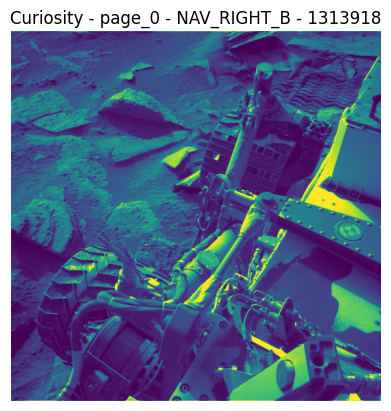

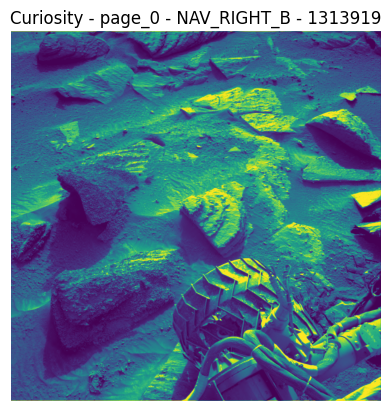

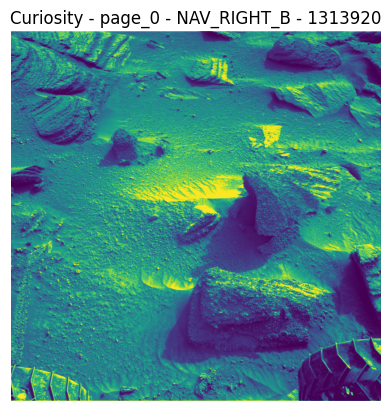

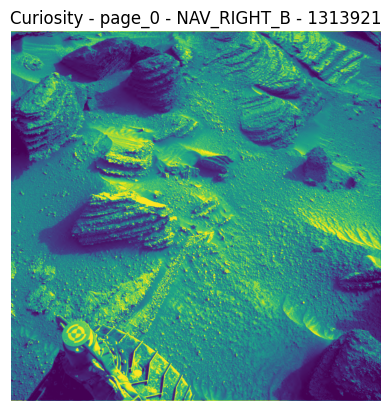

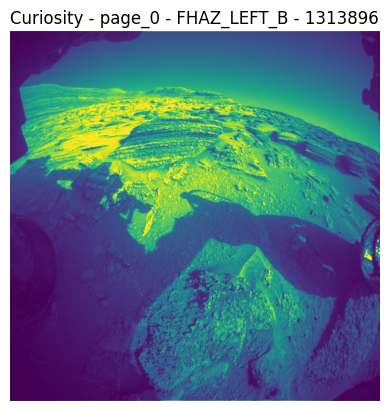

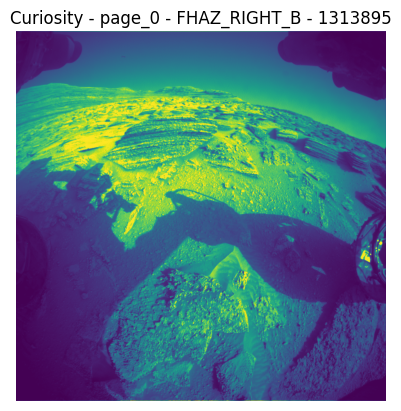

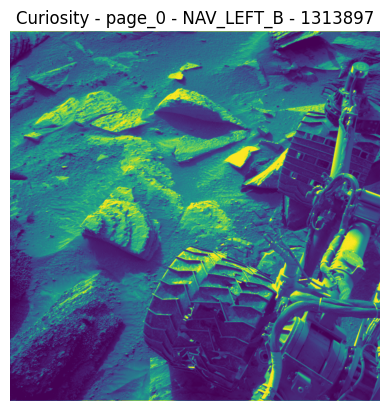

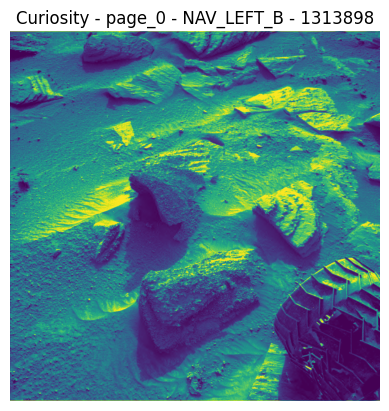

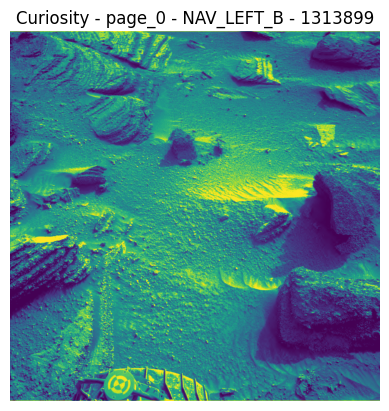

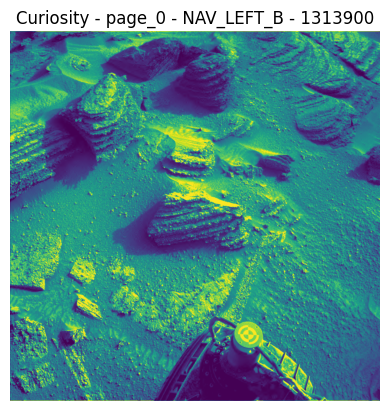

In [6]:
for i in range(10):
    photo = photos[i]
    fig, ax = plt.subplots()

    img = io.imread(photo["img_src"])
    ax.imshow(img)
    plt.axis("off")
    title = f"{photo["rover"]} - page_{photo["page"]} - {photo["camera"]} - {photo["id"]}"
    plt.title(title)
